In [25]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import math
import re
from sklearn import preprocessing
data = pd.read_csv("/content/drive/MyDrive/feature.csv", index_col=False,low_memory=False)
data.drop(columns='Unnamed: 0',inplace=True)
data.drop(columns='has_ip',inplace=True)
data.drop(columns='urlIsLive',inplace=True)

In [26]:
data.replace('Benign_list_big_final',"Benign",inplace=True)
data.replace('DefacementSitesURLFiltered',"Defacement",inplace=True)
data.replace('Malware_dataset',"Malware",inplace=True)
data.replace('phishing_dataset',"Phishing",inplace=True)
data.replace('spam_dataset',"Spam",inplace=True)
data.head()

,File,bodyLength,bscr,dse,dsr,entropy,hasHttp,hasHttps,numDigits,numImages,numLinks,numParams,numTitles,num_%20,num_@,sbr,scriptLength,specialChars,sscr,urlLength
0,Spam,31,0.064516,0,0,-4.708307,True,False,27,1,0,0,0,0,0,0.000000,0,2,0.000000,81
1,Spam,64790,0.306050,0,0,-4.576882,True,False,12,6,183,0,19,0,0,0.923800,59853,19829,3.018458,58
2,Spam,757,0.195509,0,0,-4.205536,True,False,0,6,8,0,1,0,0,0.000000,0,148,0.000000,46
3,Spam,266310,0.230915,0,0,-4.550931,True,False,13,3,831,0,648,0,0,0.312647,83261,61495,1.353947,52
4,Spam,40,0.200000,0,0,-4.689336,True,False,14,0,0,2,1,0,0,0.000000,0,8,0.000000,83


In [27]:
grouped_df = data.groupby("File")
mean_df = grouped_df.mean()
mean_df.head()

,bodyLength,bscr,dse,dsr,entropy,hasHttp,hasHttps,numDigits,numImages,numLinks,numParams,numTitles,num_%20,num_@,sbr,scriptLength,specialChars,sscr,urlLength
File,,,,,,,,,,,,,,,,,,,
Benign,50059.051273,0.215643,447.293091,3974.106818,-4.479222,0.946727,0.053818,14.677364,15.426000,100.891818,0.471364,11.824182,0.028727,0.005182,0.466055,32989.182273,11751.150727,3.977061,114.259636
Defacement,7128.453655,0.120285,0.000000,0.000000,-4.457697,1.000000,0.000000,4.574643,4.498250,17.878312,1.711029,2.789221,0.000000,0.000000,0.165609,2394.568443,1691.878612,0.658949,86.417958
Malware,2926.801211,0.080709,0.000000,0.000000,-4.269339,0.974751,0.007350,16.076697,0.555556,5.749503,0.723649,0.358582,0.038911,0.001124,0.142642,1078.286987,738.763511,0.570084,83.707652
Phishing,3729.060411,0.102345,202.291420,2259.149022,-4.474045,0.983241,0.032112,8.868741,1.468941,7.517511,0.222679,1.227797,0.024385,0.003011,0.163015,1650.983843,941.686402,0.614699,84.313999
Spam,12221.293250,0.099236,0.000000,0.000000,-4.748068,1.000000,0.000000,21.736667,1.123500,39.223250,1.223167,9.135583,0.174583,0.001750,0.176403,8966.440333,3458.677833,0.612630,126.761917


In [28]:
x = mean_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
mean_d = pd.DataFrame(x_scaled)
ben = mean_d.iloc[0].to_numpy()
defa = mean_d.iloc[1].to_numpy()
mal = mean_d.iloc[2].to_numpy()
phis = mean_d.iloc[3].to_numpy()
spam = mean_d.iloc[4].to_numpy()
col = data.columns[1:]
col

Index(['bodyLength', 'bscr', 'dse', 'dsr', 'entropy', 'hasHttp', 'hasHttps',
       'numDigits', 'numImages', 'numLinks', 'numParams', 'numTitles',
       'num_%20', 'num_@', 'sbr', 'scriptLength', 'specialChars', 'sscr',
       'urlLength'],
      dtype='object')

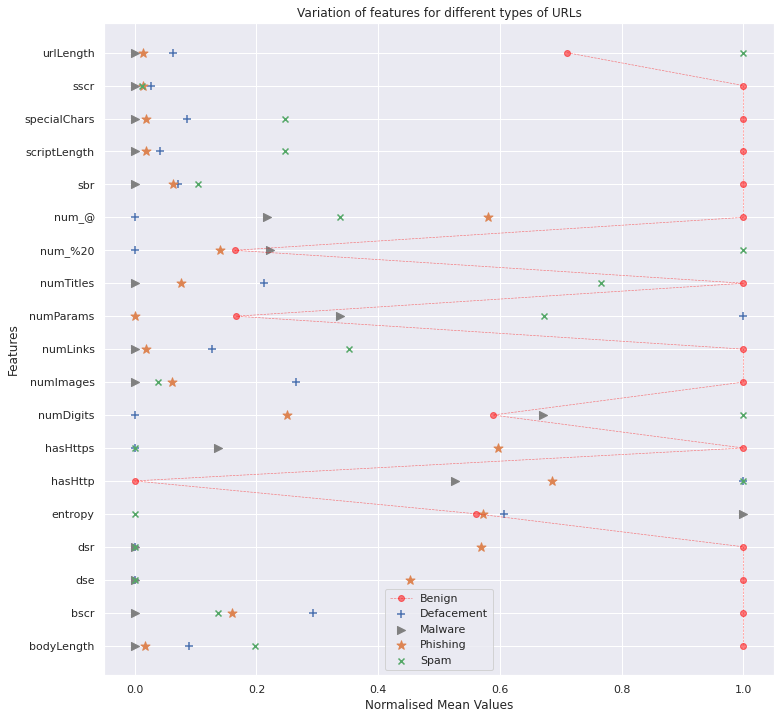

In [29]:
plt.figure(figsize=(12,12))
plt.plot(ben,col, color='red', marker='o',linewidth=0.65,linestyle="--",alpha=0.5)
plt.scatter(defa,col, marker='+',s=80)
plt.scatter(mal,col, color='grey',marker='>',s=65)
plt.scatter(phis,col, marker='*',s=90)
plt.scatter(spam,col, marker='x')
plt.legend(['Benign', 'Defacement', 'Malware', 'Phishing', 'Spam'])
plt.title("Variation of features for different types of URLs")
plt.ylabel("Features")
plt.xlabel("Normalised Mean Values")
plt.savefig('Feature_Plot.png')
plt.show()

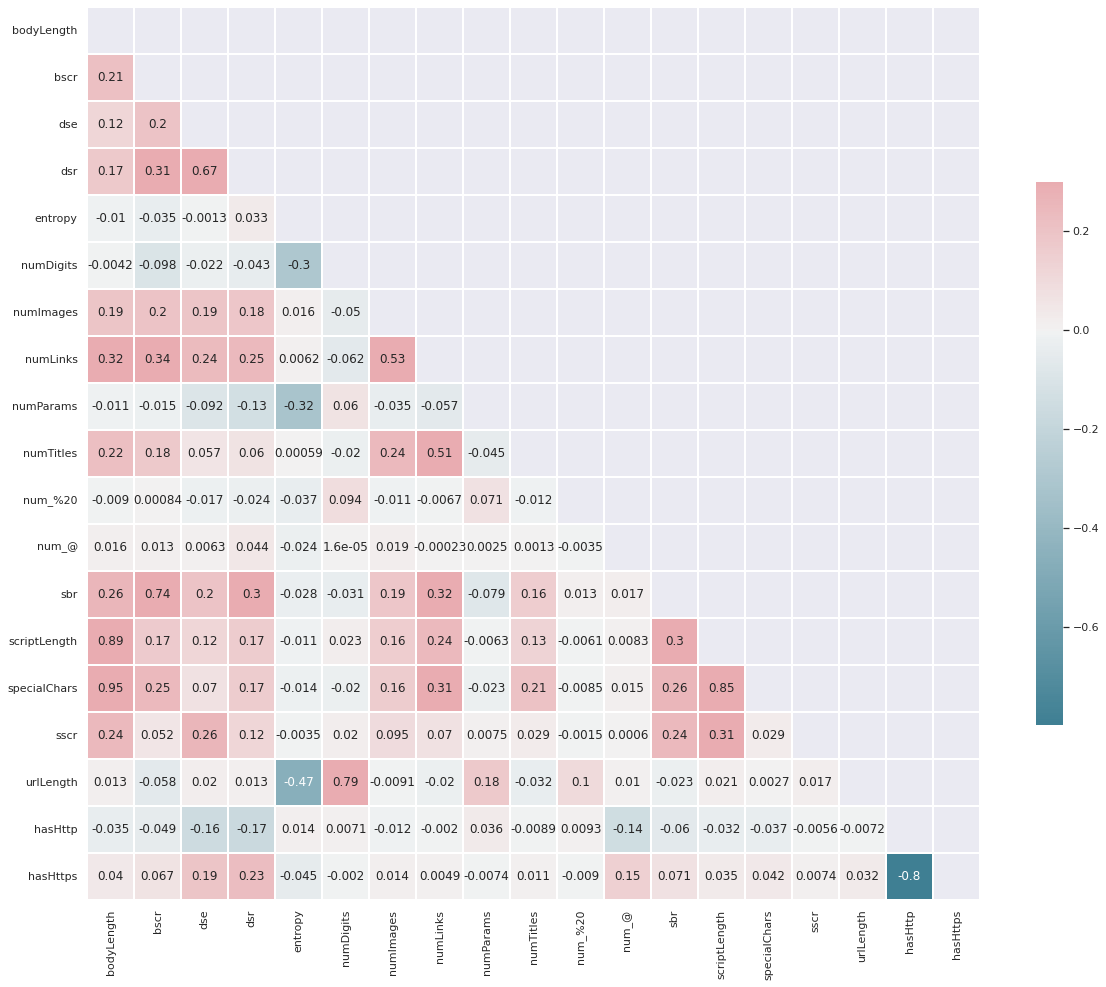

In [30]:
objects = [i for i in data.columns if 'object' in str(data.dtypes[i])]
booleans = [i for i in data.columns if 'bool' in str(data.dtypes[i])]
ints = [i for i in data.columns if 'int' in str(data.dtypes[i]) or 'float' in str(data.dtypes[i])]
corr = data[ints+booleans].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig('Feature_Corr.png')
plt.show()

In [31]:
set(data['File'])

{'Benign', 'Defacement', 'Malware', 'Phishing', 'Spam'}

In [33]:
data = data.drop(columns = "File")

In [34]:
encoder = LabelEncoder()
encoder.fit(y)
Y = encoder.transform(y)

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(data)
X = pd.DataFrame(X)

In [36]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000017,0.087977,0.259553,0.00008,0.370703,1.0,0.0,0.059471,0.001558,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000004,0.000000,0.044128
1,0.035658,0.417341,0.259553,0.00008,0.410333,1.0,0.0,0.026432,0.009346,0.093272,0.000000,0.018234,0.0,0.0,0.922293,0.033325,0.039119,0.008193,0.027758
2,0.000417,0.266603,0.259553,0.00008,0.522309,1.0,0.0,0.000000,0.009346,0.004077,0.000000,0.000960,0.0,0.0,0.000000,0.000000,0.000292,0.000000,0.019217
3,0.146569,0.314884,0.259553,0.00008,0.418158,1.0,0.0,0.028634,0.004673,0.423547,0.000000,0.621881,0.0,0.0,0.312137,0.046359,0.121319,0.003675,0.023488
4,0.000022,0.272727,0.259553,0.00008,0.376423,1.0,0.0,0.030837,0.000000,0.000000,0.111111,0.000960,0.0,0.0,0.000000,0.000000,0.000016,0.000000,0.045552


In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

input_dim = len(data.columns)
model = Sequential()
model.add(Dense(256, input_dim = input_dim , activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

In [39]:
import os
import pandas as pd
import tensorflow as ts
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from keras import backend as K
import pickle

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
model.fit(X_train,np_utils.to_categorical(y_train),epochs = 50,validation_split=0.3, batch_size = 128)

Epoch 1/50
224/224 [==============================] - 2s 5ms/step - loss: 1.2143 - accuracy: 0.4863 - val_loss: 1.0485 - val_accuracy: 0.5780
Epoch 2/50
224/224 [==============================] - 1s 5ms/step - loss: 0.9509 - accuracy: 0.6231 - val_loss: 0.8745 - val_accuracy: 0.6606
Epoch 3/50
224/224 [==============================] - 1s 5ms/step - loss: 0.8364 - accuracy: 0.6704 - val_loss: 0.8061 - val_accuracy: 0.6892
Epoch 4/50
224/224 [==============================] - 1s 4ms/step - loss: 0.7642 - accuracy: 0.6958 - val_loss: 0.8070 - val_accuracy: 0.6712
Epoch 5/50
224/224 [==============================] - 1s 4ms/step - loss: 0.7143 - accuracy: 0.7175 - val_loss: 0.6982 - val_accuracy: 0.7194
Epoch 6/50
224/224 [==============================] - 1s 4ms/step - loss: 0.6840 - accuracy: 0.7287 - val_loss: 0.6956 - val_accuracy: 0.7200
Epoch 7/50
224/224 [==============================] - 1s 4ms/step - loss: 0.6485 - accuracy: 0.7428 - val_loss: 0.6397 - val_accuracy: 0.7483
Epoch 

In [41]:
y_pred = model.predict(X_test)
predicted = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report
print(accuracy_score(y_test,predicted))
target_names = ['Benign','Defacement','Malware','Phishing','Spam']
print(classification_report(y_test, predicted, target_names=target_names))

0.8400205383994719
              precision    recall  f1-score   support

      Benign       0.96      0.93      0.94      2735
  Defacement       0.69      0.82      0.75      2499
     Malware       0.85      0.89      0.87      2834
    Phishing       0.88      0.65      0.75      2477
        Spam       0.86      0.89      0.87      3088

    accuracy                           0.84     13633
   macro avg       0.85      0.83      0.84     13633
weighted avg       0.85      0.84      0.84     13633

